# **Imporing Libraries**

In [31]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#Reading the dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/cuisine_data.csv")
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


# **Data preprocessing**

In [33]:
#Shape of the Data
df.shape

(39774, 2)

Now identify the number of classes in the target variable present in the dataset in order to classify this as a binary-text classification problem or multi-class text classification problem and also identify the distribution of the data into different classes present in the dataset.

The target variable of the given cuisine dataset consists of 20 different classes like 'greek', 'southern_us', 'filipino', 'indian' etc. So based on the target variable this is a multi-class text classification problem.

The distribution of the dataset along different classes is visualized by using value_counts.

In [34]:
#Multiple classes
df["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [35]:
#Printing value counts for each classes
df["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [36]:
#Checking for NA values
df.isna().sum()

cuisine_description    0
cuisine                0
dtype: int64

In [37]:
# Checking for NULL values
df.isnull().sum()

cuisine_description    0
cuisine                0
dtype: int64

Based on the visualization the cuisine dataset does not contain any null values and NaN values which could potentially make the model impure. 

After visualizing the number of null and NaN values present in the dataset, now check for the number of duplicate values present in the dataset which could also potentially make the data impure and reduce the accuracy.

In [38]:
#Checking for duplicate values
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 97
Shape of Data: (39774, 2)


From the observation, the dataset consists of 97 duplicated values. So all the duplicate values should be treated i.e all the 97 duplicated values should be dropped from the dataset to make the data clean.

In [39]:
#Removing duplicate values
df.drop_duplicates(inplace = True)
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 0
Shape of Data: (39677, 2)


# **text preprocessing**

The text data cannot be directly used for the model building, so we perform text preprocessing and vectorization. The text preprocessing consists of a few steps :

Removing punctuations
Lower casing
Removing stopwords
We will use the following steps of text preprocessing for the cuisine dataset to preprocess the text data.

In [40]:

def preprocessing(x):
 x=re.sub('[^a-zA-Z ]', ' ', x) #Removing non-alphabetic character
 x=x.lower() #Converting the text to lower case
 x=x.split() #Splitting the text reviews into list
 x=[word  for word in x if word not in set(stopwords.words('english'))] #Removing Stopwords 
 x=" ".join(x) #Converting list to string
 return x

Using apply operation we are preprocessing each and every row of the input variable of the cuisine dataset and visualizing the first five rows of the preprocessed data.

In [41]:
#Applying preprocessing to each rows
df["cuisine_description"] = df["cuisine_description"].apply(preprocessing)
#Preprocessed Data
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


# **Vectorization using TF IDF**

In [42]:
tv = TfidfVectorizer()
X = tv.fit_transform(df["cuisine_description"].values)
X = pd.DataFrame(X.todense(),columns=tv.get_feature_names())

In [43]:
# X Features 
X.head()

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,...,yuzukosho,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Target Variable
y = df.cuisine

# **Splitting of Data**

In [45]:
#Creating training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

In [46]:
#Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27773, 2978)
(27773,)
(11904, 2978)
(11904,)


# **Model Building**

Based on the various classification algorithms, Tree-based methods can potentially adapt to handle high-dimensional data with good accuracy. So in order to tackle the problem of high-dimensionality of the data we are introducing one of the ensemble models of the decision tree i.e Random Forest Classifier. Random Forest is one of the best-supervised machine learning methods which can achieve good performance in high-dimensional data.

We are importing RandomForestClassifier from sklearn and initializing the Random Forest Classification model.  

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier()
model = model.fit(X_train,y_train)

In [49]:
y_pred = model.predict(X_test)

In [50]:
#Computing Accuracy Score
print("Accuracy Score:",accuracy_score(y_pred,y_test))

Accuracy Score: 0.7447916666666666


In [51]:
#Prining Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   brazilian       0.41      0.85      0.56        71
     british       0.20      0.68      0.31        71
cajun_creole       0.69      0.77      0.73       392
     chinese       0.87      0.73      0.79       956
    filipino       0.47      0.82      0.60       128
      french       0.52      0.56      0.54       725
       greek       0.53      0.85      0.65       213
      indian       0.93      0.81      0.87      1032
       irish       0.30      0.72      0.42        80
     italian       0.92      0.70      0.80      3124
    jamaican       0.52      0.89      0.66        91
    japanese       0.62      0.85      0.72       313
      korean       0.68      0.90      0.78       179
     mexican       0.93      0.84      0.88      2147
    moroccan       0.60      0.85      0.70       171
     russian       0.26      0.92      0.41        39
 southern_us       0.75      0.65      0.69      1499
     spanish       0.23    

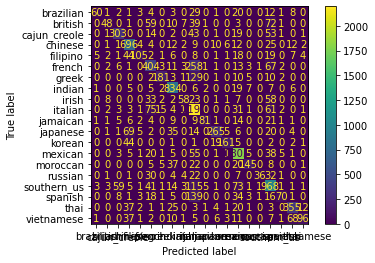

In [52]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

# **Test Cases Using Random Forest Classifier Model**

In [30]:
def prediction(a):
  a = np.array([a])
  #Vectorization using TFIDF
  a = tv.transform(a)
  #PREDICTED VALUE
  x = model.predict(a)
  return x

a ="olive oil sea salt coconut milk water garam masala ground coriander basmati rice cauliflower fresh ginger green chilies onions fresh cilantro potatoes scallions cumin"
prediction(a)

array(['indian'], dtype=object)

In [53]:
def prediction(a):
  a = np.array([a])
  #Vectorization using TFIDF
  a = tv.transform(a)
  #PREDICTED VALUE
  x = model.predict(a)
  return x

a ="tomato sauce shredded carrots spinach part skim mozzarella cheese italian seasoning english muffins split toasted chopped onion vegetable oil cooking spray chopped green bell pepper"
prediction(a)

array(['italian'], dtype=object)